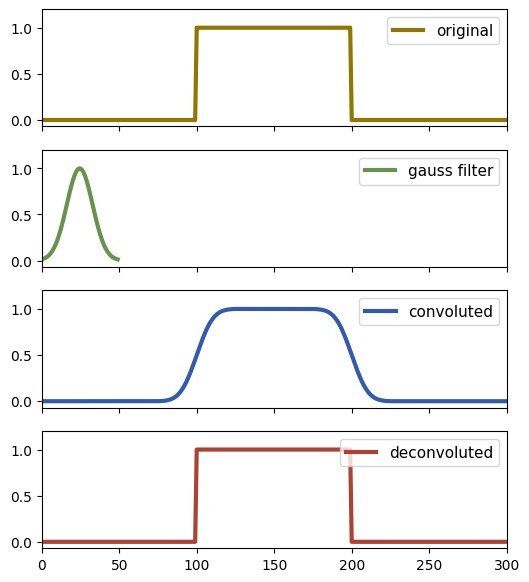

In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)

# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )

#print gauss.min()  # = 0.013 >> 0

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 

filtered = np.convolve(signal, gauss, mode='same') 

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )

#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 

s = (len(signal)-n)/2
#on both sides.

deconv_res = np.zeros(len(signal))
deconv_res[int(s):int(len(signal)-s)] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])


In [2]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt

In [3]:
x = signal.windows.gaussian(15, std=1)

In [4]:
g = signal.windows.general_gaussian(51, p=1.5, sig=7)

In [16]:
y = np.convolve(g, x)

In [17]:
#y /= y.max()

In [18]:
y.shape

(65,)

In [36]:
recovered, remainder = signal.deconvolve(y, g)

In [37]:
#recovered[recovered < 0] = 0

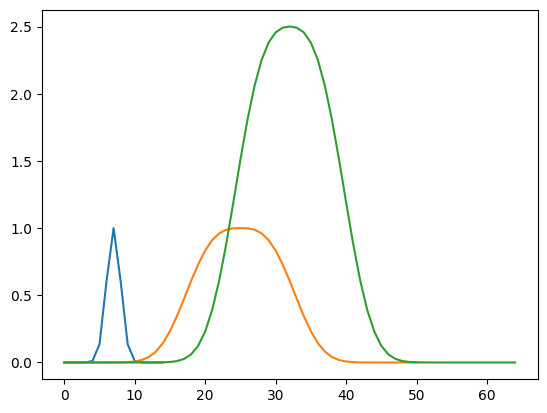

In [38]:
fig, axe = plt.subplots()
axe.plot(x)
axe.plot(g)
axe.plot(y)
#axe.plot(recovered)

In [39]:
recovered.shape

(15,)

In [40]:
remainder.shape

(65,)

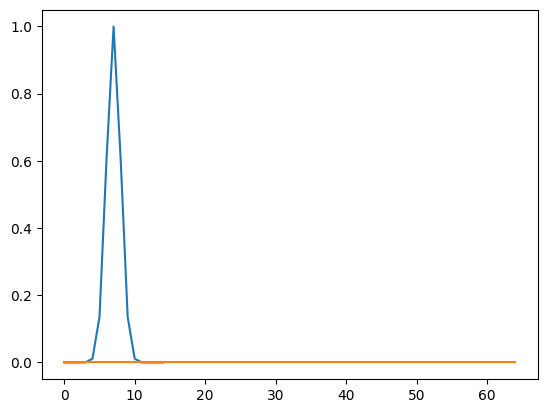

In [41]:
fig, axe = plt.subplots()
axe.plot(recovered)
axe.plot(remainder)

In [33]:
original = [0, 1, 0, 0, 1, 1, 0, 0]
impulse_response = [2, 1]
recorded = signal.convolve(impulse_response, original)
recovered, remainder = signal.deconvolve(recorded, impulse_response)

In [34]:
recovered

array([0., 1., 0., 0., 1., 1., 0., 0.])

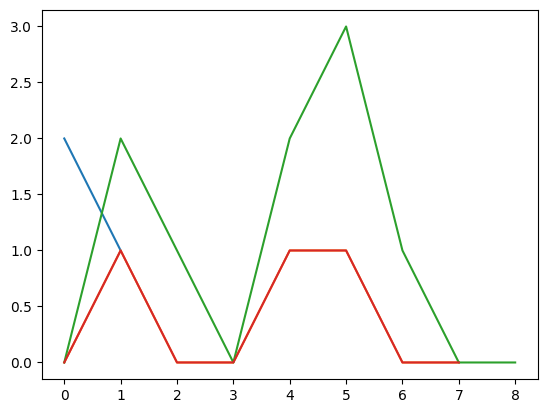

In [35]:
fig, axe =  plt.subplots()
axe.plot(impulse_response)
axe.plot(original)
axe.plot(recorded)
axe.plot(recovered)

In [46]:
y = fft.fft(x, n=2048)*fft.fft(g, n=2048)

In [48]:
xh = fft.ifft(y/fft.fft(x, n=2048))

In [ ]:
gh = fft.ifft(y/fft.fft(x, n=2048))

In [53]:
xh = np.real(xh)

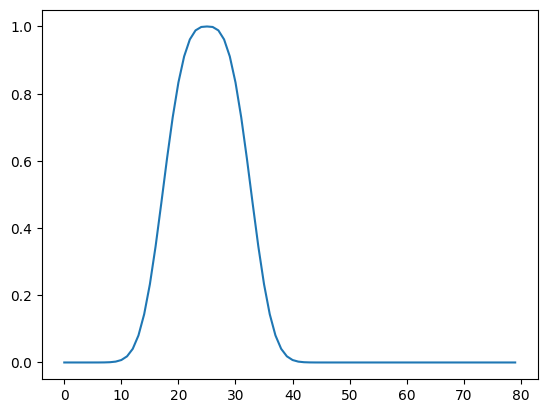

In [55]:
fig, axe = plt.subplots()
axe.plot(xh[:80])